Output()

ERROR:pymc.stats.convergence:There were 1733 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

ERROR:pymc.stats.convergence:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


     rank    elpd_waic     p_waic   elpd_diff    weight         se        dse  \
K=5     0  1113.575832  31.004859    0.000000  0.916334  23.764007   0.000000   
K=4     1  1252.853337  28.364647  139.277505  0.083666  22.368129  26.470822   
K=3     2  1302.964379  49.884534  189.388548  0.000000  15.843371  18.478934   

     warning     scale  
K=5    False  deviance  
K=4     True  deviance  
K=3     True  deviance  


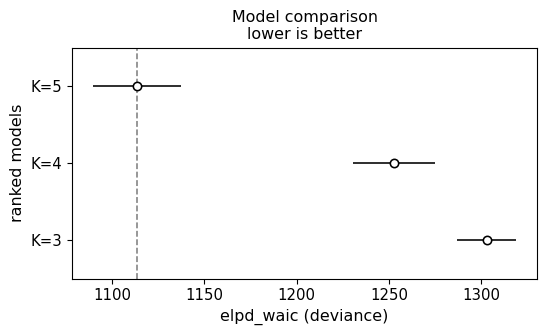

Numărul optim de subpopulații este: K=5


In [ ]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

df = pd.read_csv('date_colesterol.csv')
t = df['Ore_Exercitii'].values
y = df['Colesterol'].values

t_mean, t_std = t.mean(), t.std()
y_mean, y_std = y.mean(), y.std()
t_s = (t - t_mean) / t_std
y_s = (y - y_mean) / y_std

Ks = [3, 4, 5]
idatas = {}

for K in Ks:
    with pm.Model() as model:
        weights = pm.Dirichlet('w', a=np.ones(K))

        alpha = pm.Normal('alpha', mu=0, sigma=10, shape=K,
                          transform=pm.distributions.transforms.ordered)

        beta = pm.Normal('beta', mu=0, sigma=10, shape=K)
        gamma = pm.Normal('gamma', mu=0, sigma=10, shape=K)
        sigma = pm.HalfNormal('sigma', sigma=10, shape=K)

        mu = alpha + beta * t_s[:, None] + gamma * (t_s[:, None]**2)

        obs = pm.NormalMixture('obs', w=weights, mu=mu, sigma=sigma, observed=y_s)

        start_vals = {'alpha': np.linspace(-1, 1, K)}

        idata = pm.sample(2000, tune=1000, target_accept=0.95, random_seed=123,
                          return_inferencedata=True,
                          initvals=start_vals,
                          idata_kwargs={"log_likelihood": True})

        idatas[K] = idata

comp_df = az.compare({f'K={k}': idatas[k] for k in Ks}, ic="waic", scale="deviance")
print(comp_df)

az.plot_compare(comp_df)
plt.show()

best_K = comp_df.index[0]
print(f"Numărul optim de subpopulații este: {best_K}")

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving date_colesterol.csv to date_colesterol (1).csv
